In [2]:
# import libraries
import pandas as pd

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
print(train_df.head())

   date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...  V3  V4  V5  V6  V7  V8  \
0        0   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
1        1   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
2        2   0   0   0   1   0   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
3        3   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   
4        4   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   

   V9  forward_returns  risk_free_rate  market_forward_excess_returns  
0 NaN        -0.002421        0.000301                      -0.003038  
1 NaN        -0.008495        0.000303                      -0.009114  
2 NaN        -0.009624        0.000301                      -0.010243  
3 NaN         0.004662        0.000299                       0.004046  
4 NaN        -0.011686        0.000299                      -0.012301  

[5 rows x 98 columns]


In [5]:
print(train_df.describe())

           date_id           D1           D2           D3           D4  \
count  8990.000000  8990.000000  8990.000000  8990.000000  8990.000000   
mean   4494.500000     0.031591     0.031591     0.047831     0.575195   
std    2595.333794     0.174917     0.174917     0.213420     0.494341   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    2247.250000     0.000000     0.000000     0.000000     0.000000   
50%    4494.500000     0.000000     0.000000     0.000000     1.000000   
75%    6741.750000     0.000000     0.000000     0.000000     1.000000   
max    8989.000000     1.000000     1.000000     1.000000     1.000000   

                D5           D6           D7           D8           D9  ...  \
count  8990.000000  8990.000000  8990.000000  8990.000000  8990.000000  ...   
mean      0.190656    -0.238042     0.045717     0.142825     0.143159  ...   
std       0.392840     0.425909     0.208883     0.349914     0.350254  ...   
min       0.00000

In [6]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        8990 non-null   int64  
 1   D1                             8990 non-null   int64  
 2   D2                             8990 non-null   int64  
 3   D3                             8990 non-null   int64  
 4   D4                             8990 non-null   int64  
 5   D5                             8990 non-null   int64  
 6   D6                             8990 non-null   int64  
 7   D7                             8990 non-null   int64  
 8   D8                             8990 non-null   int64  
 9   D9                             8990 non-null   int64  
 10  E1                             7206 non-null   float64
 11  E10                            7984 non-null   float64
 12  E11                            7984 non-null   f

In [7]:
print(test_df.head())

   date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...        V4        V5  \
0     8980   0   0   0   0   1   0   0   1   0  ...  0.828042  0.999172   
1     8981   0   0   0   0   1   0   0   1   0  ...  0.831349  1.120336   
2     8982   0   0   0   0   1   0   0   0   1  ...  0.832672  1.088992   
3     8983   0   0   0   0   1   0   0   0   1  ...  0.835979  1.040988   
4     8984   0   0   0   0   0   0   1   0   1  ...  0.839947  0.944593   

         V6        V7        V8        V9  is_scored  lagged_forward_returns  \
0  0.759921 -0.803127  0.170966 -0.751909       True                0.003541   
1  0.556217 -0.686192  0.141865 -0.660326       True               -0.005964   
2  0.665344 -0.459367  0.199405 -0.510979       True               -0.007410   
3  0.594577 -0.561643  0.161706 -0.575997       True                0.005420   
4  0.715608 -0.692649  0.124669 -0.654045       True                0.008357   

   lagged_risk_free_rate  lagged_market_forward_excess_returns  
0  

In [8]:
print(test_df.describe())

          date_id    D1    D2         D3    D4         D5    D6         D7  \
count    10.00000  10.0  10.0  10.000000  10.0  10.000000  10.0  10.000000   
mean   8984.50000   0.0   0.0   0.100000   0.0   0.400000   0.0   0.100000   
std       3.02765   0.0   0.0   0.316228   0.0   0.516398   0.0   0.316228   
min    8980.00000   0.0   0.0   0.000000   0.0   0.000000   0.0   0.000000   
25%    8982.25000   0.0   0.0   0.000000   0.0   0.000000   0.0   0.000000   
50%    8984.50000   0.0   0.0   0.000000   0.0   0.000000   0.0   0.000000   
75%    8986.75000   0.0   0.0   0.000000   0.0   1.000000   0.0   0.000000   
max    8989.00000   0.0   0.0   1.000000   0.0   1.000000   0.0   1.000000   

              D8         D9  ...         V3         V4         V5         V6  \
count  10.000000  10.000000  ...  10.000000  10.000000  10.000000  10.000000   
mean    0.200000   0.300000  ...   0.573743   0.819907   1.010369   0.747487   
std     0.421637   0.483046  ...   0.223494   0.024329   

In [9]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 99 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date_id                               10 non-null     int64  
 1   D1                                    10 non-null     int64  
 2   D2                                    10 non-null     int64  
 3   D3                                    10 non-null     int64  
 4   D4                                    10 non-null     int64  
 5   D5                                    10 non-null     int64  
 6   D6                                    10 non-null     int64  
 7   D7                                    10 non-null     int64  
 8   D8                                    10 non-null     int64  
 9   D9                                    10 non-null     int64  
 10  E1                                    10 non-null     float64
 11  E10                   

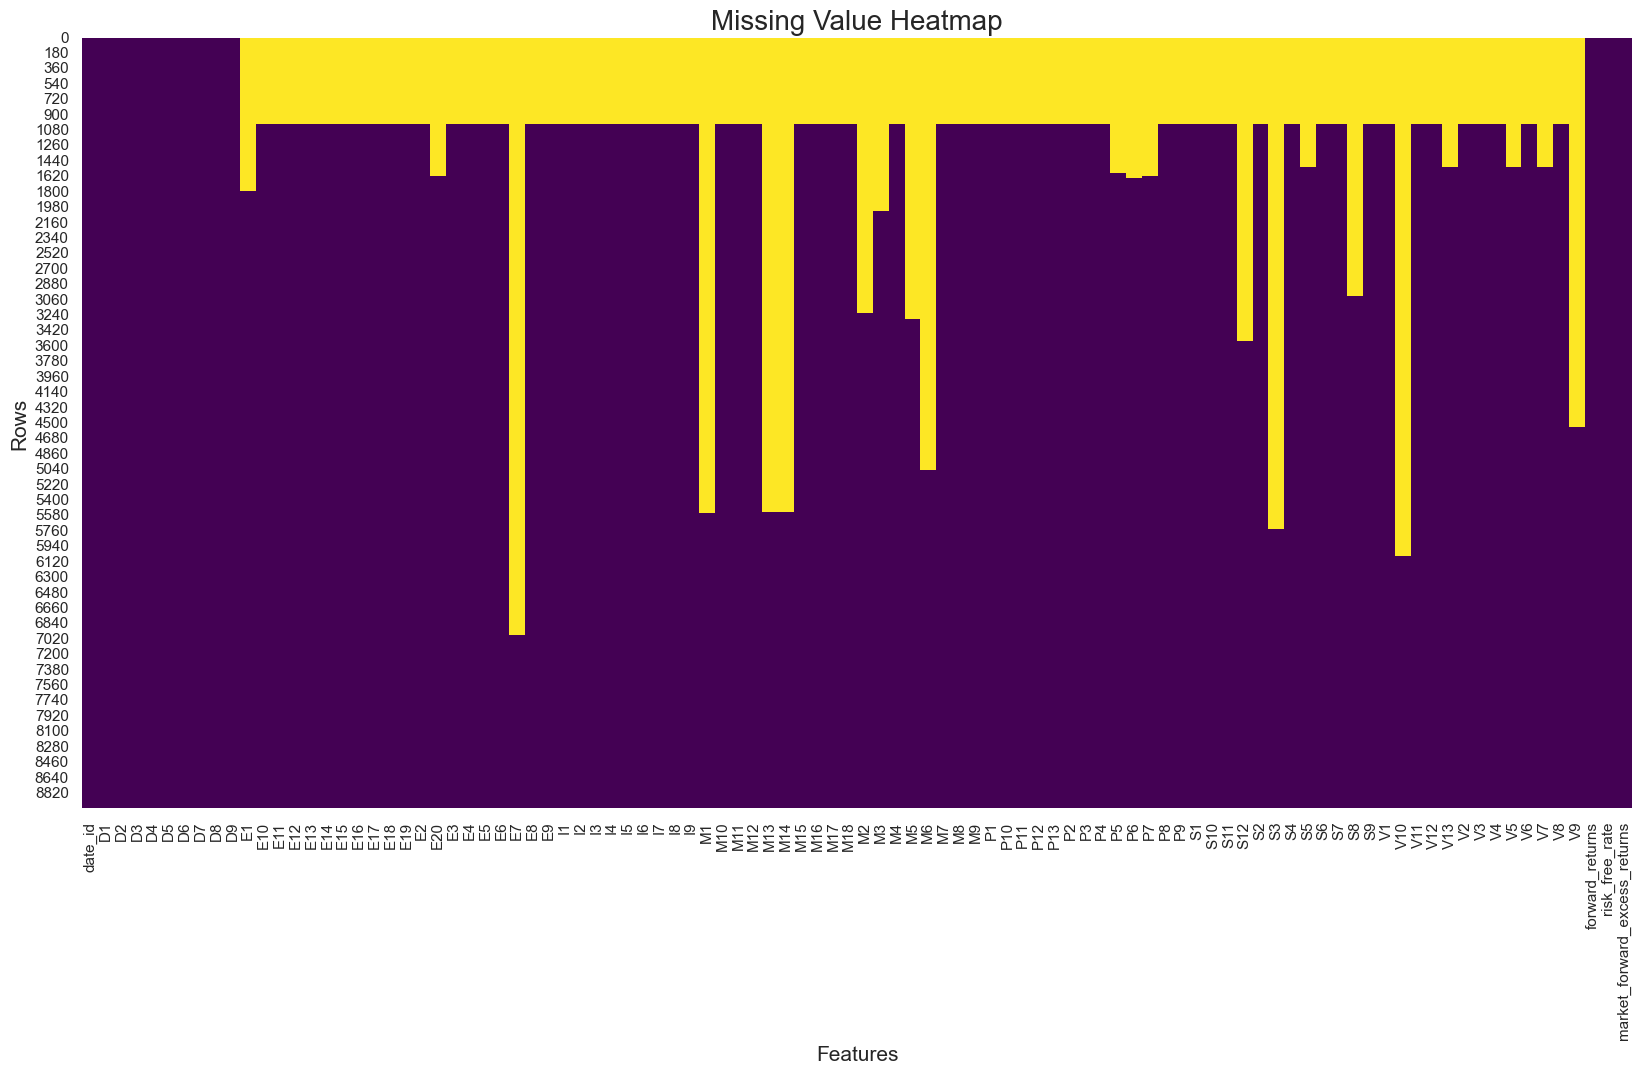

Percentage of missing values per feature:
E7     77.519466
V10    67.285873
S3     63.770857
M1     61.701891
M13    61.624027
M14    61.624027
M6     56.095662
V9     50.489433
S12    39.343715
M5     36.518354
M2     35.784205
S8     33.470523
M3     22.447164
E1     19.844271
P6     18.220245
E20    17.975528
P7     17.975528
P5     17.508343
V5     16.818687
S5     16.807564
dtype: float64


In [12]:
import matplotlib.pylab as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize = (20, 10))

sns.heatmap(train_df.isnull(), cbar=False, cmap = "viridis", ax = ax)

ax.set_title("Missing Value Heatmap", fontsize=20)
ax.set_xlabel("Features", fontsize=15)
ax.set_ylabel("Rows", fontsize = 15)

plt.show()

missing_percentage = (train_df.isnull().sum() / len(train_df)) * 100

print("Percentage of missing values per feature:")
print(missing_percentage.sort_values(ascending=False).head(20))
